In [1]:
import numpy as np
from lib.read_file import C_read, M_read
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import normalize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
import lib.preprocess as pp
import matplotlib.pyplot as plt
import time

In [2]:
import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext(master="local[4]")

In [ ]:
C = C_read('covtype.data')
M = M_read('MNIST_train.csv')

In [ ]:
#preprocess
MX = M[:, :-1]
My = M[:, -1]
CX = C[:, :-1]
Cy = C[:, -1]
MX = normalize(MX, norm='l2', axis=0)
CX = normalize(CX, norm='l2', axis=0)
lda_M = LDA()
lda_C = LDA()

CX = lda_C.fit_transform(CX, Cy)
MX = lda_M.fit_transform(MX, My)

M = np.concatenate((MX, My.reshape((len(My), 1))), axis=1)
C = np.concatenate((CX, Cy.reshape((len(Cy), 1))), axis=1)

M_train, M_test = pp.TTsplit(M)
C_train, C_test = pp.TTsplit(C)

In [18]:
def fit_score(clf, data, train, test):
    clf.fit(data[train, :-1], data[train, -1])
    return (sum(clf.predict(data[test, :-1]) == data[test, -1])*1.0/len(test))

In [5]:
def svm_fold(train_set, kernelName, nFold=2, C=1.0, gamma = 'auto', class_weight=None, all_result=False):
    start_time = time.time()
    clf = SVC(kernel=kernelName, C=C, gamma = gamma, class_weight = class_weight)
    kf = KFold(n_splits=nFold, shuffle=True)
    #score = sc.parallelize(kf.split(train_set)).map(lambda x: (clf, train_set, x[0], x[1])).collect()
    score = []
    for train, test in kf.split(train_set):
        clf.fit(train_set[train, :-1], train_set[train, -1])
        score.append(sum(clf.predict(train_set[test, :-1]) == train_set[test, -1])*1.0/len(test))
    print "kernel type = %s, score = %f" %(kernelName, np.mean(score))
    print "used time:", (time.time() - start_time), 'seconds'
    if all_result: return score
    else: return np.mean(score)

In [7]:
M_train_sub = pp.getSubset(M_train, 50) #50, 75, 100
C_train_sub = pp.getSubset(C_train, 50) #50, 75, 100

In [8]:
svm_fold(M_train_sub, kernelName = 'linear', nFold=2)
svm_fold(M_train_sub, kernelName = 'linear', nFold=5)
svm_fold(M_train_sub, kernelName = 'poly', nFold=2)
svm_fold(M_train_sub, kernelName = 'poly', nFold=5)
svm_fold(M_train_sub, kernelName = 'rbf', nFold=2)
svm_fold(M_train_sub, kernelName = 'rbf', nFold=5)
svm_fold(M_train_sub, kernelName = 'sigmoid', nFold=2)
svm_fold(M_train_sub, kernelName = 'sigmoid', nFold=5)

kernel type = linear, score = 0.896444
used time: 1.68860077858 seconds
kernel type = linear, score = 0.896762
used time: 6.43248605728 seconds
kernel type = poly, score = 0.905079
used time: 1.6527121067 seconds
kernel type = poly, score = 0.911619
used time: 5.82753515244 seconds
kernel type = rbf, score = 0.915429
used time: 2.56353712082 seconds
kernel type = rbf, score = 0.919175
used time: 8.88465285301 seconds
kernel type = sigmoid, score = 0.671810
used time: 3.16644883156 seconds
kernel type = sigmoid, score = 0.657905
used time: 9.39706587791 seconds


0.65790476190476188

In [86]:
svm_fold(C_train_sub, kernelName = 'linear', nFold=2)
svm_fold(C_train_sub, kernelName = 'linear', nFold=5)
svm_fold(C_train_sub, kernelName = 'poly', nFold=2)
svm_fold(C_train_sub, kernelName = 'poly', nFold=5)
svm_fold(C_train_sub, kernelName = 'rbf', nFold=2)
svm_fold(C_train_sub, kernelName = 'rbf', nFold=5)
svm_fold(C_train_sub, kernelName = 'sigmoid', nFold=2)
svm_fold(C_train_sub, kernelName = 'sigmoid', nFold=5)

kernel type = linear, score = 0.719239
used time: 701.754698992 seconds
kernel type = linear, score = 0.719294
used time: 3742.7948792 seconds
kernel type = poly, score = 0.712533
used time: 1261.02185798 seconds
kernel type = poly, score = 0.712758
used time: 9565.30119777 seconds
kernel type = rbf, score = 0.737409
used time: 872.465178013 seconds
kernel type = rbf, score = 0.739805
used time: 4451.11680722 seconds
kernel type = sigmoid, score = 0.579579
used time: 1179.86001921 seconds
kernel type = sigmoid, score = 0.589717
used time: 6767.25737405 seconds


In [5]:
M_train_sub = pp.getSubset(M_train, 75) #50, 75, 100
C_train_sub = pp.getSubset(C_train, 75) #50, 75, 100

In [6]:
svm_fold(M_train_sub, kernelName = 'linear', nFold=2)
svm_fold(M_train_sub, kernelName = 'linear', nFold=5)
svm_fold(M_train_sub, kernelName = 'poly', nFold=2)
svm_fold(M_train_sub, kernelName = 'poly', nFold=5)
svm_fold(M_train_sub, kernelName = 'rbf', nFold=2)
svm_fold(M_train_sub, kernelName = 'rbf', nFold=5)
svm_fold(M_train_sub, kernelName = 'sigmoid', nFold=2)
svm_fold(M_train_sub, kernelName = 'sigmoid', nFold=5)

kernel type = linear, score = 0.898370
used time: 3.26535201073 seconds
kernel type = linear, score = 0.899005
used time: 12.4046220779 seconds
kernel type = poly, score = 0.909841
used time: 3.39332699776 seconds
kernel type = poly, score = 0.913693
used time: 11.3609249592 seconds
kernel type = rbf, score = 0.920042
used time: 5.42599105835 seconds
kernel type = rbf, score = 0.922370
used time: 16.975577116 seconds
kernel type = sigmoid, score = 0.655111
used time: 7.14006400108 seconds
kernel type = sigmoid, score = 0.637206
used time: 22.1132938862 seconds


In [60]:
svm_fold(C_train_sub, kernelName = 'linear', nFold=2)
svm_fold(C_train_sub, kernelName = 'linear', nFold=5)
svm_fold(C_train_sub, kernelName = 'poly', nFold=2)
svm_fold(C_train_sub, kernelName = 'poly', nFold=5)
svm_fold(C_train_sub, kernelName = 'rbf', nFold=2)
svm_fold(C_train_sub, kernelName = 'rbf', nFold=5)
svm_fold(C_train_sub, kernelName = 'sigmoid', nFold=2)
svm_fold(C_train_sub, kernelName = 'sigmoid', nFold=5)

kernel type = linear, score = 0.899640
CPU times: user 14.1 s, sys: 67.4 ms, total: 14.2 s
Wall time: 14.3 s


In [18]:
M_train_sub = pp.getSubset(M_train, 100) #50, 75, 100
C_train_sub = pp.getSubset(C_train, 100) #50, 75, 100

In [12]:
svm_fold(M_train_sub, kernelName = 'linear', nFold=2)
svm_fold(M_train_sub, kernelName = 'linear', nFold=5)
svm_fold(M_train_sub, kernelName = 'poly', nFold=2)
svm_fold(M_train_sub, kernelName = 'poly', nFold=5)
svm_fold(M_train_sub, kernelName = 'rbf', nFold=2)
svm_fold(M_train_sub, kernelName = 'rbf', nFold=5)
svm_fold(M_train_sub, kernelName = 'sigmoid', nFold=2)
svm_fold(M_train_sub, kernelName = 'sigmoid', nFold=5)

kernel type = linear, score = 0.897778
used time: 6.02907919884 seconds
kernel type = linear, score = 0.898762
used time: 21.0485219955 seconds
kernel type = poly, score = 0.913429
used time: 5.08974599838 seconds
kernel type = poly, score = 0.915810
used time: 18.0702478886 seconds
kernel type = rbf, score = 0.920794
used time: 7.94448208809 seconds
kernel type = rbf, score = 0.923079
used time: 25.3648750782 seconds
kernel type = sigmoid, score = 0.638349
used time: 11.3708970547 seconds
kernel type = sigmoid, score = 0.631714
used time: 34.327903986 seconds


In [19]:
svm_fold(C_train_sub, kernelName = 'linear', nFold=2)
#svm_fold(C_train_sub, kernelName = 'linear', nFold=5)
svm_fold(C_train_sub, kernelName = 'poly', nFold=2)
#svm_fold(C_train_sub, kernelName = 'poly', nFold=5)
svm_fold(C_train_sub, kernelName = 'rbf', nFold=2)
#svm_fold(C_train_sub, kernelName = 'rbf', nFold=5)
svm_fold(C_train_sub, kernelName = 'sigmoid', nFold=2)
#svm_fold(C_train_sub, kernelName = 'sigmoid', nFold=5)

kernel type = linear, score = 0.718897
used time: 3268.37423706 seconds
kernel type = poly, score = 0.714039
used time: 8295.85963893 seconds
kernel type = rbf, score = 0.742273
used time: 3882.42275 seconds
kernel type = sigmoid, score = 0.577748
used time: 6094.206388 seconds


0.57774825961954301

In [20]:
C_train_sub.shape

(435759, 7)

In [16]:
%%time
array = np.arange(1, 2000, 7.5)
score = sc.parallelize(array)\
.map(lambda x: svm_fold(C_train_sub[:10000], kernelName = 'rbf', nFold=2, C=x))
score = score.collect()

CPU times: user 139 ms, sys: 82.9 ms, total: 222 ms
Wall time: 31min 7s


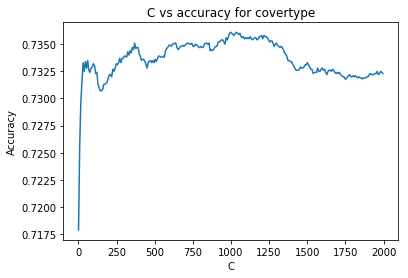

In [17]:
plt.figure()
plt.title("C vs accuracy for covertype")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.plot(array, score)
plt.show()

In [49]:
%%time
array = np.arange(0.1, 5, 0.1)
score = sc.parallelize(array)\
.map(lambda x: svm_fold(M_train_sub, kernelName = 'rbf', nFold=5, C=x))
score = score.collect()

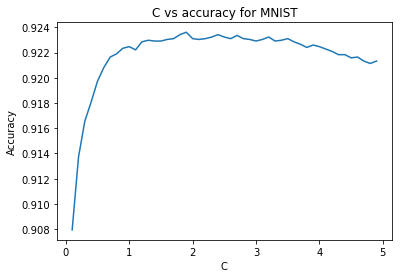

In [50]:
plt.figure()
plt.title("C vs accuracy for MNIST")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.plot(array, score)
plt.show()

In [ ]:
%%time
# grid search
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(M_train_sub[:, :-1], M_train_sub[:, -1])

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

In [8]:
%%time
C_range = np.logspace(-1, 1, 13)
gamma_range = np.logspace(-2, 0, 13)
score = sc.parallelize(C_range)\
.map(lambda x: (x, gamma_range))\
.flatMapValues(lambda x: x)\
.map(lambda x: (x, svm_fold(M_train_sub[:len(M_train_sub/2)], kernelName = 'rbf', nFold=2, C=x[0], gamma=x[1]))).cache()

CPU times: user 12.8 ms, sys: 8.67 ms, total: 21.5 ms
Wall time: 543 ms


In [9]:
%%time
acc_pair = score.collect()
#print acc_pair
acc_pair_square = []
count = 0
for i in range(13):
    temp = []
    for j in range(13):
        temp.append(acc_pair[count][1]) #row: C, col: gamma
        count += 1
    acc_pair_square.append(temp)

acc_pair_square = np.array(acc_pair_square)
#print acc_pair_square
#print acc_pair_np.reshape(()
#score = sc.parallelize(acc_pair)
#rs = score.reduce(lambda x, y: x if x[1] >= y[1] else y)
#print rs

CPU times: user 40.4 ms, sys: 15.4 ms, total: 55.8 ms
Wall time: 5min 49s


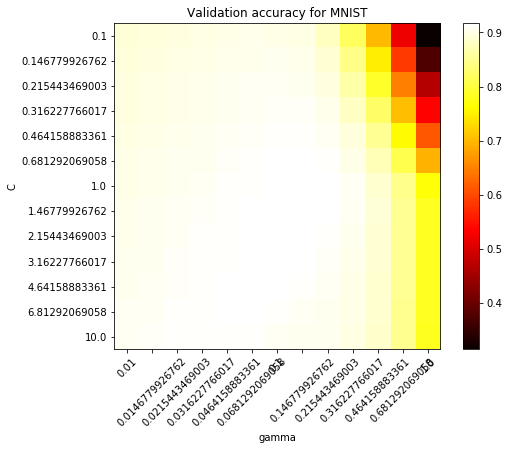

In [10]:
plt.figure(figsize=(8, 6))
#plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(acc_pair_square, interpolation='nearest', cmap=plt.cm.hot,
           )
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy for MNIST')
plt.show()

In [11]:
np.save('acc_pair_M_small', acc_pair)

In [13]:
%%time
C_range = np.logspace(-1, 11, 13)
gamma_range = np.logspace(-9, 3, 13)
score = sc.parallelize(C_range)\
.map(lambda x: (x, gamma_range))\
.flatMapValues(lambda x: x)\
.map(lambda x: (x, svm_fold(C_train[:1000], kernelName = 'rbf', nFold=2, C=x[0], gamma=x[1]))).cache()

CPU times: user 43.5 ms, sys: 80.5 ms, total: 124 ms
Wall time: 271 ms


In [14]:
%%time
acc_pair = score.collect()
#print acc_pair
acc_pair_square = []
count = 0
for i in range(13):
    temp = []
    for j in range(13):
        temp.append(acc_pair[count][1]) #row: C, col: gamma
        count += 1
    acc_pair_square.append(temp)

acc_pair_square = np.array(acc_pair_square)
#print acc_pair_square

#score = sc.parallelize(acc_pair)
#rs = score.reduce(lambda x, y: x if x[1] >= y[1] else y)
#print rs

CPU times: user 148 ms, sys: 60.5 ms, total: 209 ms
Wall time: 35min 29s


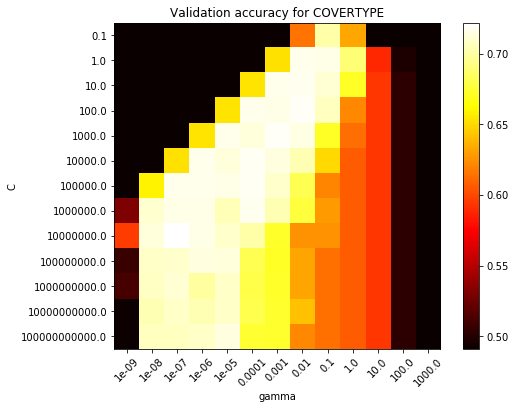

In [15]:
plt.figure(figsize=(8, 6))
#plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(acc_pair_square, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy for COVERTYPE')
plt.show()

In [21]:
%%time
clf1 = SVC(kernel='rbf', C=1, gamma = 0.1)
clf1.fit(M_train_sub[:, :-1], M_train_sub[:, -1])
print sum(clf1.predict(M_test[:, :-1]) == M_test[:, -1])/len(M_test)

9675
CPU times: user 7.82 s, sys: 57.9 ms, total: 7.87 s
Wall time: 7.88 s


In [22]:
%%time
clf2 = SVC(kernel='rbf', C=100, gamma = 0.01)
clf2.fit(C_train_sub[:, :-1], C_train_sub[:, -1])
print sum(clf2.predict(C_test[:, :-1]) == C_test[:, -1])/len(C_test)

106294
CPU times: user 2h 6min 33s, sys: 3min 30s, total: 2h 10min 3s
Wall time: 2h 10min 10s


In [10]:
acc_pair_C = np.load('acc_pair_C_small.npy')
bias= []
var = []
count = 0
for i in range(13):
    temp = []
    temp2 = []
    for j in range(13):
        temp.append(1 - acc_pair_C[count][1]) #row: C, col: gamma
        temp2.append(1 - acc_pair_C[count][1] - (1 - acc_pair_C[count][1])**2)
        count += 1
    bias.append(temp)
    var.append(temp2)

bias = np.array(bias)
var = np.array(var)

In [6]:
#stability
M_train_sub = pp.getSubset(M_train, 50) #50, 75, 100
M_stab_50 = svm_fold(M_train_sub, kernelName = 'rbf', nFold=10, all_result=True)
print "variance:", np.var(M_stab_50)

kernel type = rbf, score = 0.917079
used time: 18.7507460117 seconds
variance: 2.94441924918e-05


In [7]:
#stability
M_train_sub = pp.getSubset(M_train, 75) #50, 75, 100
M_stab_75 = svm_fold(M_train_sub, kernelName = 'rbf', nFold=10, all_result=True)
print "variance:", np.var(M_stab_75)

kernel type = rbf, score = 0.921228
used time: 34.9458811283 seconds
variance: 2.54733429619e-05


In [8]:
#stability
M_train_sub = pp.getSubset(M_train, 100) #50, 75, 100
M_stab_100 = svm_fold(M_train_sub, kernelName = 'rbf', nFold=10, all_result=True)
print "variance:", np.var(M_stab_100)

kernel type = rbf, score = 0.922889
used time: 58.5726900101 seconds
variance: 8.51499118166e-06


In [9]:
#stability
C_train_sub = pp.getSubset(C_train, 50) #50, 75, 100
C_stab_50 = svm_fold(C_train_sub, kernelName = 'rbf', nFold=3, all_result=True)
print "variance:", np.var(C_stab_50)
print C_stab_50

kernel type = rbf, score = 0.739103
used time: 2017.71553302 seconds
variance: 4.19634668576e-06
[0.74191416415382705, 0.73709139977418558, 0.73830308704871539]


In [ ]:
#stability
C_train_sub = pp.getSubset(C_train, 75) #50, 75, 100
C_stab_75 = svm_fold(C_train_sub, kernelName = 'rbf', nFold=3, all_result=True)
print "variance:", np.var(C_stab_75)
print C_stab_75

In [ ]:
#stability
C_train_sub = pp.getSubset(C_train, 100) #50, 75, 100
C_stab_100 = svm_fold(C_train_sub, kernelName = 'rbf', nFold=3, all_result=True)
print "variance:", np.var(C_stab_100)
print C_stab_100